# Titanic Dataset and analysis

## Project Overview
This project analyzes the Titanic dataset to explore factors that influenced survival rates.

## Steps
1. Data Loading  
2. Exploratory Data Analysis (EDA)  
3. Data Cleaning  
4. Feature Engineering  
5. Modeling (optional)  
6. Conclusion  

## Dataset
The dataset comes from Seaborn "titanic" dataset

#### Importing all the nedded libraries

In [1]:
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import sklearn as sk
from scipy import stats

#### Load Data

In [2]:
F=sb.load_dataset('titanic')
F

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### Checking Data

In [7]:
F.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


#### Checking the dataframe, not using print because output looks cleaner without it.

In [11]:
F.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Describing whole data, For all the columns

In [13]:
F.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.361582,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,13.019697,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Checking fur Null values

In [4]:
print(F.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


#### Checking the value as percentage of total

In [4]:
F.isnull().sum()/len(F)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

#### Heatmap and Barchart to visualize Null values in the data.

<Axes: >

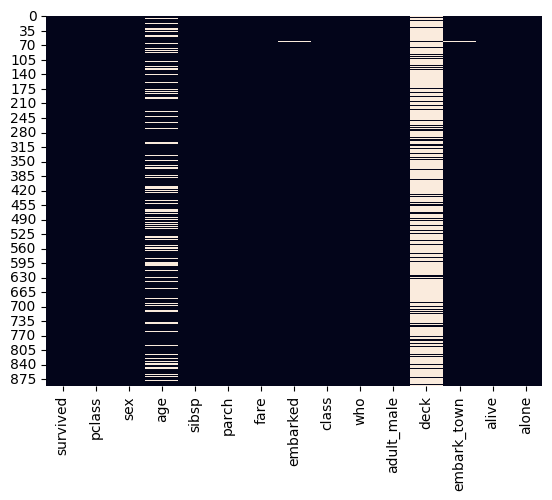

In [31]:
sb.heatmap(F.isnull(), cbar=False)

The above heat can best visualize the null values in columns giving a clear sense of empty values.

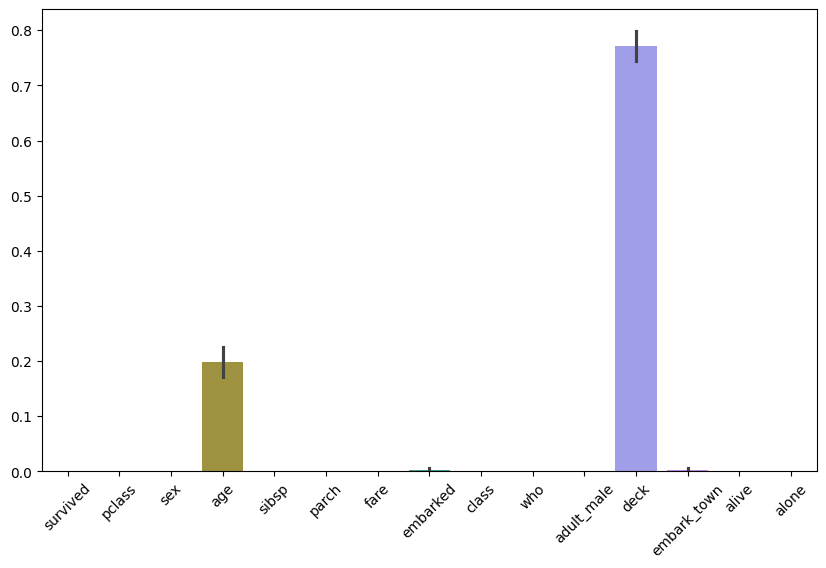

In [44]:
plt.figure(figsize=(10,6))
sb.barplot(F.isnull())
plt.xticks(rotation=45)
plt.show()

Null values in columns represented by bar graph in percentage. Here in deck it shows nearly 0.8, meaning almost 80% nulls.

#### Filling the null values. Only age as deck is non numerical column and mathematical operations cannot be done on it.

In [9]:
F['age']=F['age'].fillna(F['age'].median())
ff

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

Filling the null values in "age" with  median values for better analysis.

#### Univariate Analysis Of the Data.

##### Of Numerical Columns

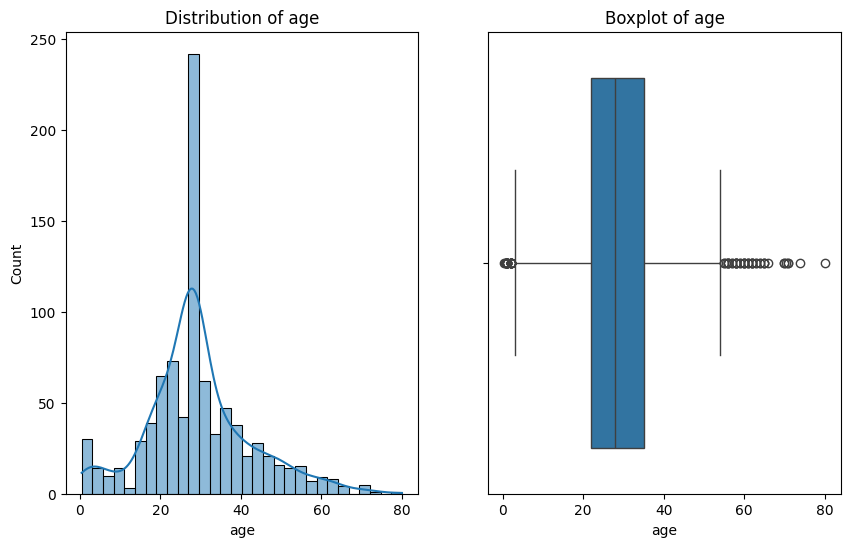

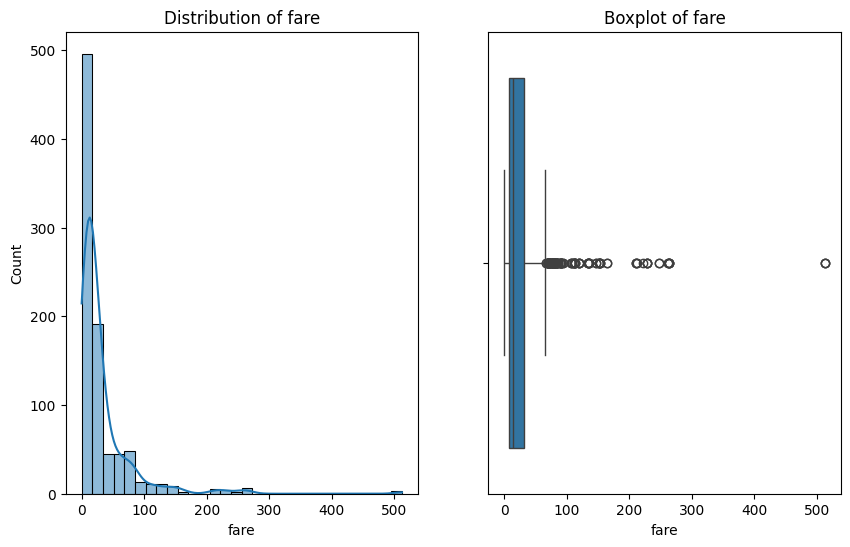

In [4]:
num_cols=['age', 'fare']

F['age'] = F['age'].fillna(F['age'].median())

for col in  num_cols:
    plt.figure(figsize=(10,6))

    plt.subplot(1,2,1)
    sb.histplot(F[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")

    plt.subplot(1,2,2)
    sb.boxplot(x=F[col])
    plt.title(f"Boxplot of {col}")

    plt.show()

##### Description
          Histogram                                                             Boxplot
Age

    Most passengers aboard are mostly 20-40 years old,              The interquartile range is roughly 20–40 years,
    with few children and elderly.                                   with few children and elderly. with median age
                                                                    of 28 years old.
     
Fare

     Most apssengers paid fairly low fare comapred                   Most apssengers paid fairly low fare comapred
     to higher ticket prices, less than 50 pounds.                   to higher ticket prices, less than 50 pounds, 
                                                                     with median fare around 15 pounds. IQR is around
                                                                     5-40 pounds.

In [3]:
F['fare'].median()

np.float64(14.4542)

Here the median can be rounded of to 15 pounds.

In [5]:
F['age'].median()

np.float64(28.0)

The median age is 28 years old.

##### Of Non_Numerical columns

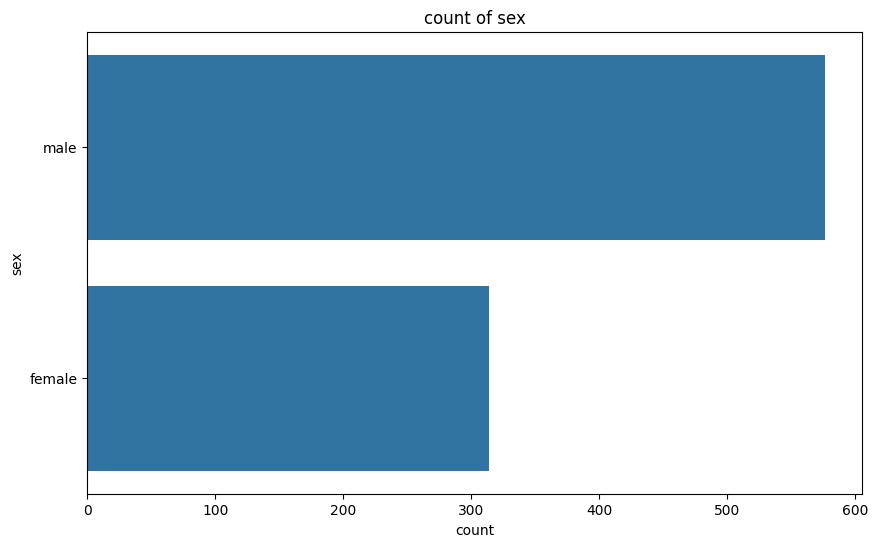

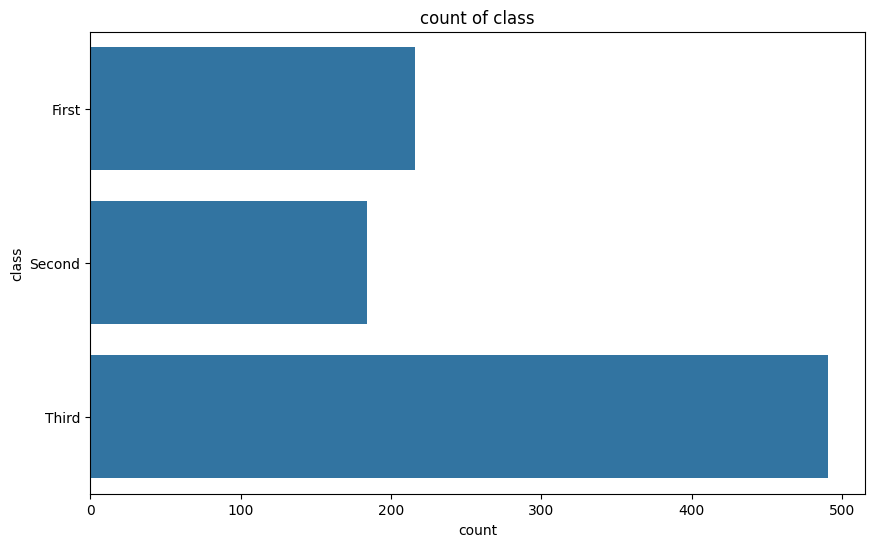

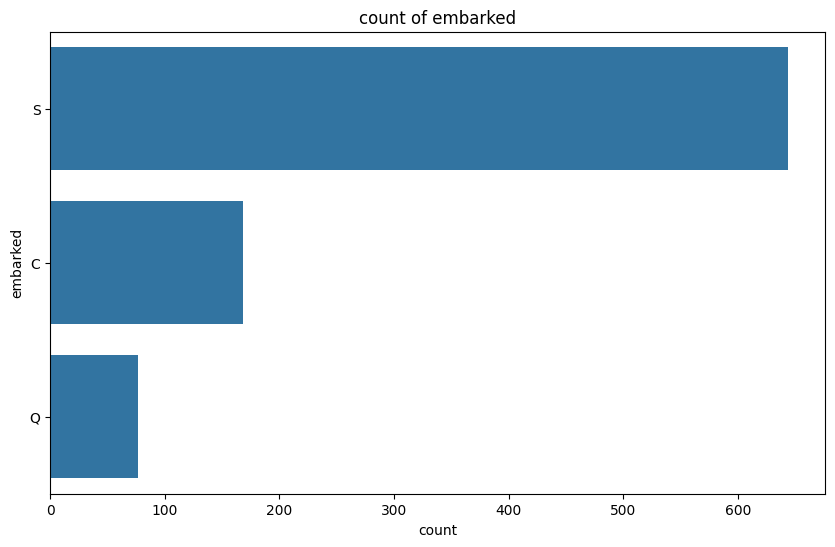

In [66]:
cat_cols=['sex', 'class', 'embarked']

for col in cat_cols:
    plt.figure(figsize=(10,6))
    sb.countplot(F[col])
    plt.title(f'count of {col}')
    plt.show()

##### Description

The first graph thet majority passengers aboard were males. The ratio of male to female passengers are almost 2:1. 

The second graph shows that highest number of passenegrs were in third class. While girst class having second most amount passengers
and second class being least filled.

The third graph shows highest number of passengers boarded the ship at S(Southampton port in England).
Few people also boarded at C(Cherbourg in France) and least nuber of passengers boarded at Q(Queenstown in Ireland)

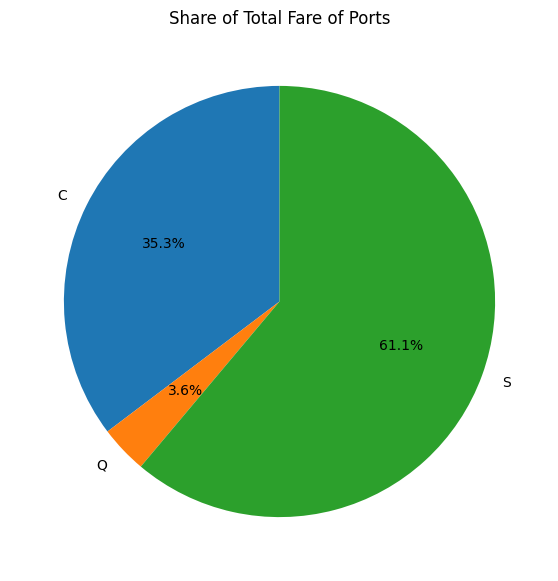

In [17]:
plt.figure(figsize=(7,7))
plt.pie(z, labels=z.index, autopct='%1.1f%%', startangle=90)
plt.title("Share of Total Fare of Ports")
plt.show()


The above Pie chart shows ditribution of passengers from embarking port.

In [15]:
print('Total Fare share of ports')
print('==========================')
y=F.groupby('embarked')['fare'].sum()
print(y)
print('                     ')
print('---------------------')
print('                     ')
print('Fare shere of ports in percentage')
z=(y/y.sum()*100).round(2)
print(z)

Total Fare share of ports
embarked
C    10072.2962
Q     1022.2543
S    17439.3988
Name: fare, dtype: float64
                     
---------------------
                     
Fare shere of ports in percentage
embarked
C    35.30
Q     3.58
S    61.12
Name: fare, dtype: float64


Passenger and fare distribution among ports is almost identical. Meaning the fare share was "Fair". lol

#### Bivariate Analysis

#### Relation Between Gender and Survival

In [18]:
h=(F.groupby("embarked")["survived"].mean() * 100).round(2)
print(h)

embarked
C    55.36
Q    38.96
S    33.70
Name: survived, dtype: float64


Survival of passengers by embarking port in percentage.

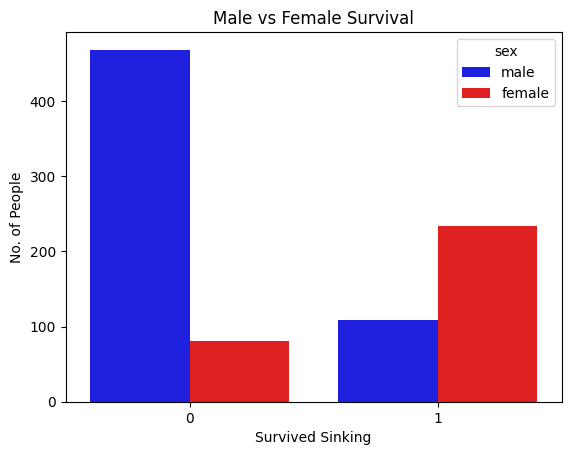

In [19]:
sb.countplot(data=F, x='survived',hue='sex', palette={'female': 'red', 'male': 'blue'})
plt.title('Male vs Female Survival')
plt.xlabel('Survived Sinking')
plt.ylabel('No. of People')
plt.show()

Here 0= Did not survive, 1= Survived. It is like that in the Dataset. It is clear from graph that 2:3 of women survived while very few men survived the incident. The ratio of men survived is around 1:6.

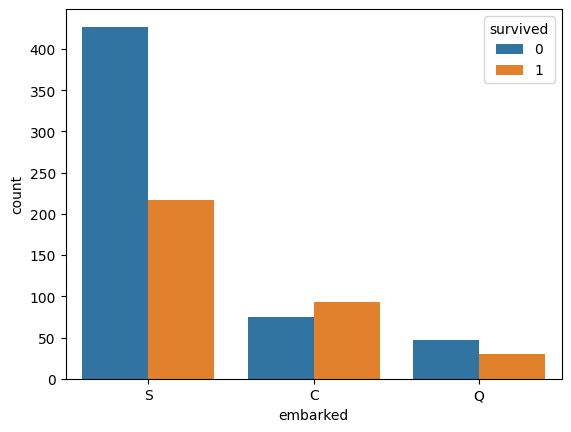

In [6]:
sb.countplot(data=F,x='embarked', hue='survived')
plt.show()

This graph shows the survival of passenegrs based on the embarking port. Most people boarded the ship at S(southampton, England),
and almost 2:3 of passenegrs from S did not survive. Survival of passengers from other ports is not that bad, comparitively.

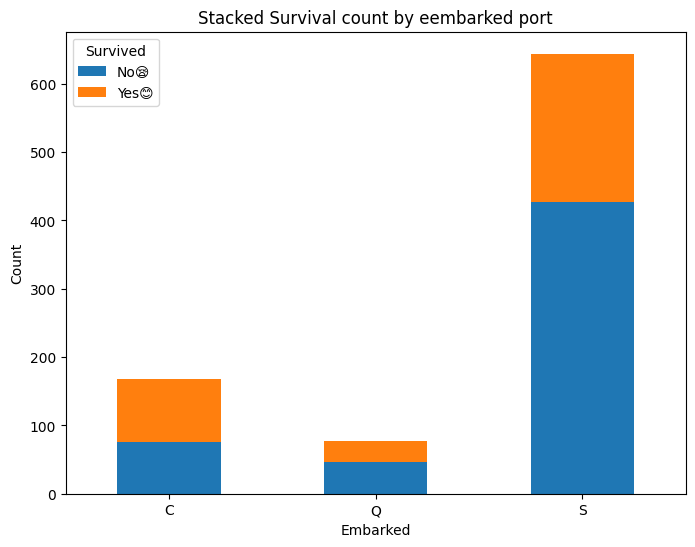

In [13]:
Stacked = pd.crosstab(F['embarked'], F['survived'])

Stacked.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title("Stacked Survival count by eembarked port")
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Survived", labels=["No😪", "Yes😊"])
plt.show()


The Satcked graph gives a better representation of tge survivors against total passengers from each embarking port.

#### Relation Between Survival and Class

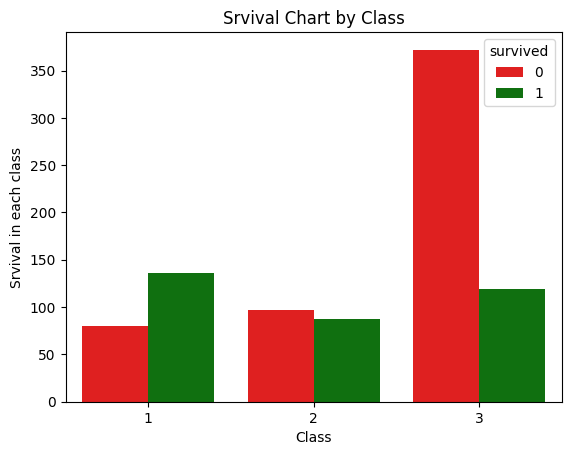

In [83]:
sb.countplot(data=F,x='pclass', hue='survived', palette={0: 'red', 1: 'green'})
plt.title('Srvival Chart by Class')
plt.xlabel('Class')
plt.ylabel('Srvival in each class')
plt.show()

This graph represents survival by class. the passengers in first class had highest survival rate, followed by second class and least people survived from third class, which seems <30%.

#### Relation Between Fare and Survival

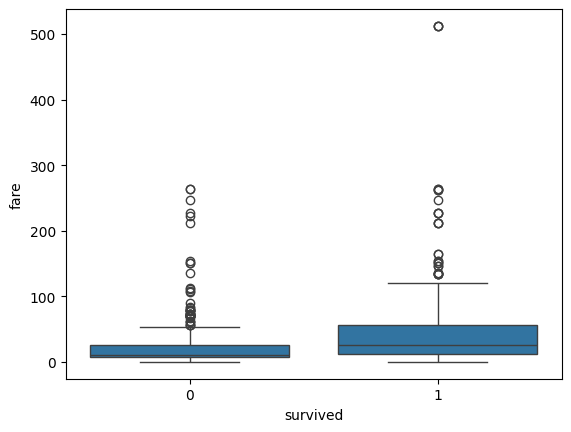

In [73]:
sb.boxplot(data=F, y='fare', x='survived')
plt.show()

Most fares are low for both groups, but survivors have a slightly higher median fare, and there are several extreme high-fare outliers, especially among survivors.

#### Relation between Class, Gender and Survival.

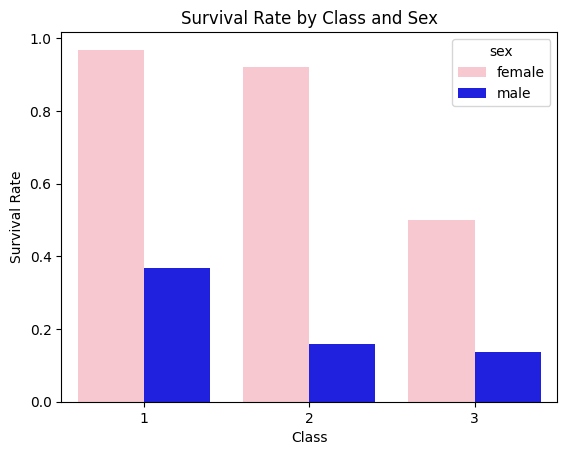

In [48]:
rate = F.groupby(['sex', 'pclass'])['survived'].mean().reset_index()
sb.barplot(data=rate, x='pclass', y='survived', hue='sex', palette={'male':'blue','female':'pink'})
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Class and Sex')
plt.show()


When analyzed between survival against gender and class, it is clear that almost all women from first class survived the incident,
around 90% women survived in second class and around 50% of third class women survived.

For men, less than 40% of men survived in first class, and in second and third class men survival rate was around 10-15%.

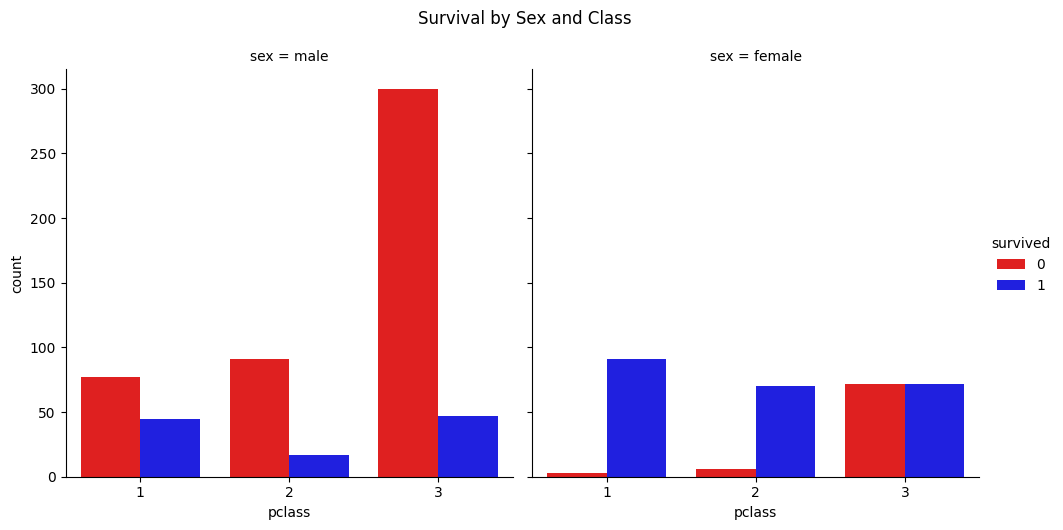

In [22]:
sb.catplot(x="pclass", hue="survived", col="sex", kind="count", data=F, palette={1:'blue', 0:'red'})
plt.suptitle("Survival by Sex and Class", y=1.05)
plt.show()

Even clearer representation of survival of men and women in each class.

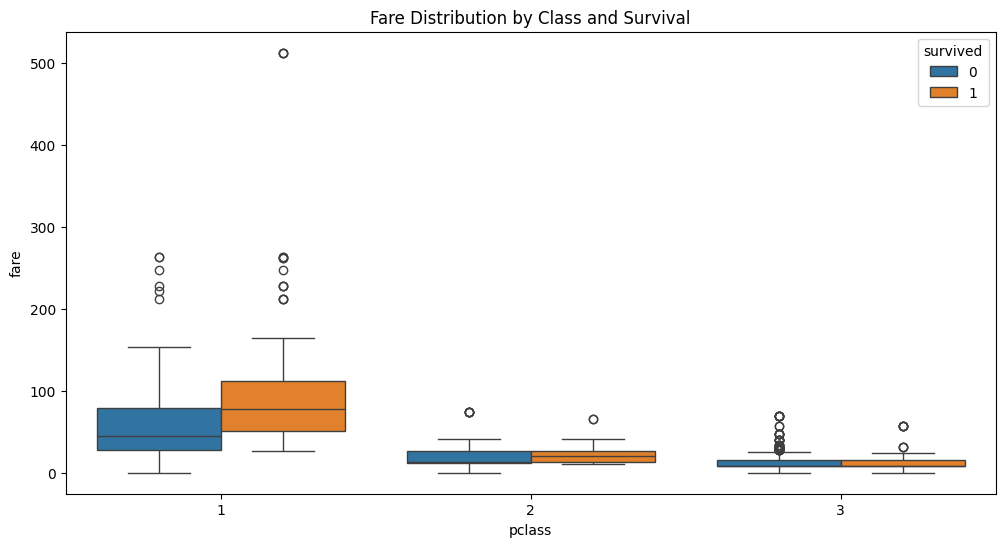

In [24]:
plt.figure(figsize=(12,6))
sb.boxplot(x="pclass", y="fare", hue="survived", data=F)
plt.title("Fare Distribution by Class and Survival")
plt.show()


Within each class, survivors tend to have slightly higher fares than non-survivors, and there are several high-fare outliers, especially in 1st class.

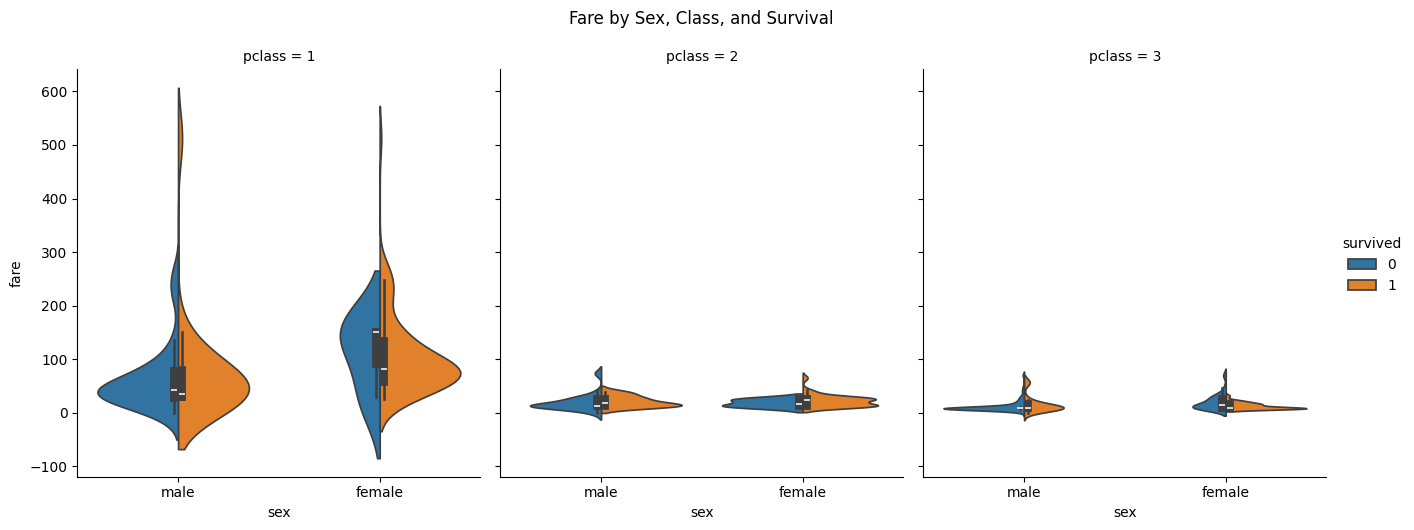

In [25]:
vp = sb.catplot(
    x="sex", y="fare", hue="survived", col="pclass",
    kind="violin", split=True, data=F, height=5, aspect=0.9
)
vp.fig.suptitle("Fare by Sex, Class, and Survival", y=1.05)
plt.show()


Fares increase with class, females in 1st class show a wider distribution including high fares, 

and survivors generally have higher fare distributions within each class. The shapes indicate both density and outliers in each subgroup

In [32]:
male_fares = F[F['sex']=='male']['fare'].dropna()
female_fares = F[F['sex']=='female']['fare'].dropna()

t_stat, p_value = stats.ttest_ind(male_fares, female_fares, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_value)


t-statistic: -5.077499013458909
p-value: 5.388057409693902e-07


The t-test comparing fares of male and female passengers shows a t-statistic of -5.08 and a very small p-value (~5.39×10⁻⁷).

Since the p-value is much smaller than 0.05, we reject the null hypothesis and conclude that there is a statistically significant difference in average fares between males and females,

with males generally paying lower fares on average.

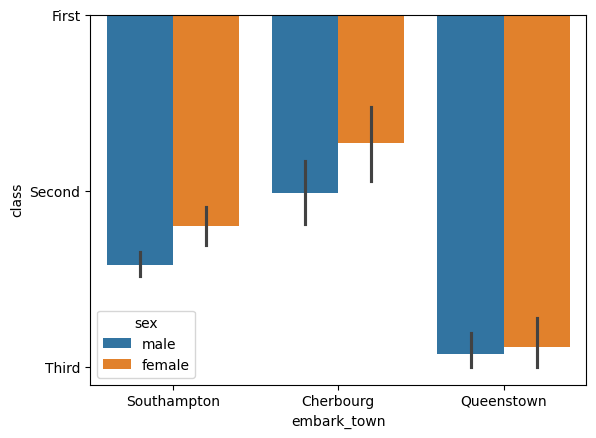

In [20]:
sb.barplot(x='embark_town',y='class',hue='sex', data=F)
plt.show()

The ratio of male and female passengers in each port seems to similar, with fewer more men than women.

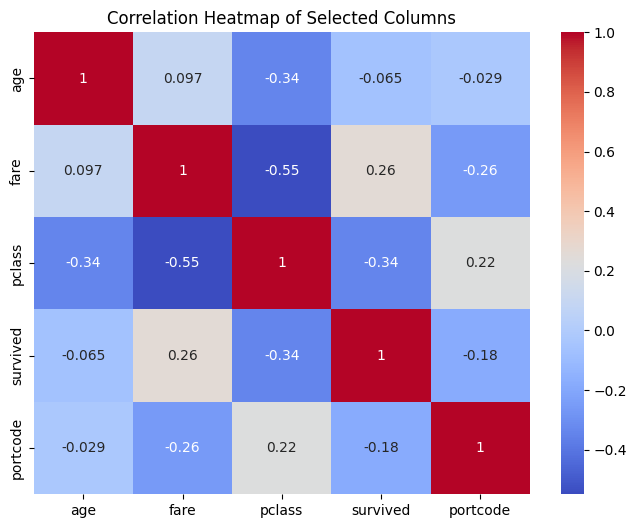

In [31]:
F['portcode']=F['embarked'].map({'S':0, 'C':1, 'S':2})

colss=['age', 'fare', 'pclass', 'survived', 'portcode']
df_colheat=F[colss]

corr=df_colheat.corr()

plt.figure(figsize=(8,6))
sb.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Selected Columns")
plt.show()

The heatmap shows correlations among age, fare, class, survival, and embarking port (portcode). Fare is positively correlated with class and weakly with survival,

while age shows very little correlation with other variables. Portcode and survival have very weak correlations with the rest, indicating most variables are largely independent

### Summary

-- Women and children had higher survival rates.

-- Higher-class passengers had better chances of survival.

-- Fare correlates positively with survival probability.

-- Most apssengers onboard were British, as most poeople boarded the ship at S(Southampton, England)>

-- 